**Written and Directed by:** *Μιχαήλ Βασιλάκος 03117069*

# **Συστήματα και Τεχνολογίες Γνώσης**
# **Θέμα 2**
Σε αυτό το θέμα θα κατασκευάσετε μια οντολογία η οποία θα περιγράφει το πεδίο των ταινιών, και θα είναι συμβατή με το γράφο γνώσης που κατασκευάσατε στο πρώτο θέμα.

## 1ο Μέρος: Συντακτικά Ορθή Οντολογία


Σε αυτό το μέρος θα μετατρέψετε το γράφο γνώσης που δημιουργήσατε στο πρώτο θέμα, σε συντακτικά ορθή οντολογία. Όποιος επιθυμεί (κυρίως για άτομα που δεν έχουν ολοκληρώσει το πρώτο θέμα) μπορεί να εργαστεί με το γράφο γνώσης που σας δίνεται στο αρχείο ```movies.nt```.
<!-- Όποιος χρησιμοποιήσει τη δική του γνώση (που δημιούργησε στο πρώτο θέμα) κι **ΌΧΙ** το movies.nt θα έχει bonus της τάξεως του 20%.  -->

Θα εργαστούμε με τη βιβλιοθήκη [owlready2](https://owlready2.readthedocs.io/en/latest/) η οποία δίνει πρόσβαση σε τεχνολογίες αναπαράστασης γνώσης και οντολογιών (π.χ. OWL) μέσω της Python.


In [ ]:
!pip install owlready2

     |████████████████████████████████| 23.7MB 1.5MB/s 
  Created wheel for owlready2: filename=Owlready2-0.31-cp37-cp37m-linux_x86_64.whl size=20409716 sha256=bf644427003af1b023655362ea86ecedbce4fdb3aa6ebe8333416bf6fcf39c27
  Stored in directory: /root/.cache/pip/wheels/9d/17/e4/54fb8381c51746a0d686b06ef3e3f607789defd8e1580bcb1b
Successfully built owlready2


### 1.1 Αντιμετώπιση των parsing errors
Η owlready2 κάνει κάποιους ελέγχους κατά το parsing ενός αρχείου, για παράδειγμα αν κάτι είναι δηλωμένο ως ακέραιος σε έναν κόμβο της μορφής
```
"186.0"^^<http://www.w3.org/2001/XMLSchema#int>
```
Η owlready2 ελέγχει (μέσω των τύπων της python) αν αυτό είναι όντως ακέραιος. Στη συγκεκριμένη περίπτωση θα προκύψει σφάλμα
```
ValueError: invalid literal for int() with base 10: '186.0'
``` 
Επομένως το πρώτο ζητούμενο είναι να τροποποιήσετε κατάλληλα το γράφο γνώσης σας ώστε να τρέξει χωρίς σφάλμα η εντολή:
```python
onto = get_ontology('file://path/to/knowledge/graph').load()
```

Στο μέρος αυτό διορθώνουμε τα parsing errors του αρχείου movies_knowledge.nt ώστε να καταφέρουμε να το διαβάσουμε με την owlready2. Το διορθωμένο αρχείο θα είναι το movies_knowledge_2.nt.

In [ ]:
#Λύση 1.1

#################
## fp1 is the knowledge graph constructed in the previous exercise
fp1 = open('movies_knowledge.nt')
## fp2 is the corrected graph for use with owlready2
fp2 = open('movies_knowledge_2.nt', 'w')

## parse line and correct mistakes
line = fp1.readline()
while line:
  tokens = line.split()

  ## correct critic reviews from float to integer
  if tokens != [] and tokens[1] == '<http://example.org/props/critic_reviews>':
    subtokens = tokens[2].split('^^')
    subtokens[0] = subtokens[0].replace('.0"', '"')
    line = tokens[0] + ' ' + tokens[1] + ' ' + subtokens[0] + '^^' + '<http://www.w3.org/2001/XMLSchema#integer> .\n'
  ## correct user reviews from float to integer
  elif tokens != [] and tokens[1] == '<http://example.org/props/user_reviews>':
    subtokens = tokens[2].split('^^')
    subtokens[0] = subtokens[0].replace('.0"', '"')
    line = tokens[0] + ' ' + tokens[1] + ' ' + subtokens[0] + '^^' + '<http://www.w3.org/2001/XMLSchema#integer> .\n'
  ## replace date with dateTime to be owl2 compatible (date isn't supported by owl2)
  elif tokens != [] and tokens[1] == '<http://example.org/props/release_date>':
    subtokens = tokens[2].split('^^')
    subtokens[0] = subtokens[0].replace('"','')
    line = tokens[0]+ ' ' + tokens[1] + ' "'+subtokens[0]+'T00:00:00+00:00"^^<http://www.w3.org/2001/XMLSchema#dateTime> .\n'

  print(line, file=fp2,end='')
  line = fp1.readline()

fp1.close()
fp2.close()

#################

### 1.2 Μετατροπή σε owl
Αφού διορθώσαμε τα λάθη, πλέον το αρχείο μας μπορεί να φορτωθεί μέσω της βιβλιοθήκης owlready2. Αν και η μορφή (format) του αρχείου είναι συμβατή με το πρότυπο OWL **δεν είναι μια σημασιολογικά ορθή οντολογία**, είναι απλά ένα σύνολο από δεδομένα σε μια μορφή που είναι συμβατή με το πρότυπο OWL. Μια οντολογία ορίζει ένα σύνολο από κανόνες που διέπουν έναν κόσμο, **δεν** είναι απλά μια αναπαράσταση των δεδομένων όπως είναι ένας γράφος γνώσης (αν και τα περισσότερα αξιώματα της οντολογίας μπορούν να αναπαρασταθούν με γράφους γνώσης).

Τα βασικά συστατικά μέρη μιας οντολογίας είναι οι ατομικές έννοιες -τις οποίες συναντάμε στην OWL ως κλάσεις-(concepts-CN), οι ατομικοί ρόλοι -τους οποίους συναντάμε στην OWL ως ιδιότητες αντικειμένου και ιδιότητες τύπου δεδομένων- (roles-RN) και τα άτομα (individuals-IN). Με βάση αυτά κατασκευάζονται εκφράσεις σύνθετων εννοιών  και ρόλων, και αξιώματα (axioms).

Στην παρούσα φάση δεν έχουμε αξιώματα και τόσο το σύνολο CN όσο και το RN είναι κενά. Πρακτικά έχουμε μόνο πληροφορία που αφορά τους individuals (τα άτομα του κόσμου μας) η οποία προέρχεται από το γράφο γνώσης μας. Δεν έχουμε λοιπόν καμία πληροφορία για τους κανόνες που διέπουν τον κόσμο, τις έννοιες από τις οποίες αποτελείται ο κόσμος μας όπως και τις πιθανές σχέσεις μεταξύ αυτών των εννοιών. Αυτή την πληροφορία καλείστε να συμπληρώσετε στη συνέχεια της άσκησης.

Στην οντολογία μας λοιπόν θα πρέπει να ορίσουμε αρχικά έννοιες:
```xml
#RDF/XML
<owl:Class rdf:about="http://example.org/ns/Concept"/>

#N-triples
<http://example.org/ns/Concept> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Class> 
```
καθώς και ρόλους:
```xml
#RDF/XML
<owl:ObjectProperty rdf:about="http://example.org/props/role"/>

#N-triples
<http://example.org/props/role> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#ObjectProperty> 
```



#### 1.2.1 Αρχικοποίηση του CN

Σε πρώτη φάση πρέπει να ορίσετε τις απαραίτητες έννοιες για να αναπαρασταθούν σωστά τα δεδομένα σας, δηλαδή κάθε άτομο του κόσμου σας να έχει έναν τύπο ο οποίος θα είναι κάποια έννοια. Για παράδειγμα στα δεδομένα σας έχετε σίγουρα ταινίες και σκηνοθέτες. Για να αναπαρασταθούν σωστά αυτά τα άτομα είναι απαραίτητες οι έννοιες "Movie" και "Director" αντίστοιχα. Φυσικά μπορείτε να δώσετε ό,τι ονόματα επιθυμείτε εσείς στις έννοιες, όμως θα συνιστούσαμε να κρατήσετε το ίδιο μοτίβο σε όλη την άσκηση, και να δώσετε χαρακτηριστικά αλλά και συνοπτικά ονόματα τόσο στις έννοιες όσο και στους ρόλους. Για αρχή θα ορίσουμε όλες τις έννοιες να είναι υποέννοιες (subClassOf) του Thing, και σε επόμενο ερώτημα θα προχωρήσουμε στη δημιουργία πιο σύνθετων ιεραρχιών. 

Πρώτα όμως πρέπει να αρχικοποιήσουμε μια οντολογία φορτώνοντας το γράφο γνώσης στο owlready2 με την εντολή
```python
onto=get_ontology('file://path/to/knowledge/graph').load()
```
Θα ορίσουμε τους ονοματοχώρους που χρησιμοποιεί, στη συγκεκριμένη περίπτωση  "prop" για τους ρόλους (που αντιστοιχούν στις ιδιότητες του γράφου- properties) και "ns" για τις έννοιες.
```python
prop = onto.get_namespace('http://example.org/props/')
ns = onto.get_namespace('http://example.org/ns/')
```

Ο ορισμός των εννοιών Movie και Director κάτω από το Thing, χρησιμοποιώντας τον ονοματοχώρο ```http://example.org/ns/``` στην owlready2 γίνεται ως εξής:
```python
with onto:
  with ns:
    class Movie(Thing):
      pass
    class Director(Thing):
      pass
```

Αν τώρα αποθηκεύσουμε την οντολογία, θα παρατηρήσουμε πως έχουν προστεθεί τριάδες της μορφής
```xml
#RDF/XML
<owl:Class rdf:about="http://example.org/ns/Director">
  <rdfs:subClassOf rdf:resource="http://www.w3.org/2002/07/owl#Thing"/>
</owl:Class>

#N-triples
<http://myontology.org#Director> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Class> .
<http://myontology.org#Director> <http://www.w3.org/2000/01/rdf-schema#subClassOf> <http://www.w3.org/2002/07/owl#Thing> .
```
Δηλαδή έχει οριστεί η έννοια Director ως owl:Class η οποία είναι υποέννοια (rdfs:subClassOf) του owl:Thing.

Με τον ίδιο τρόπο καλείστε να αρχικοποιήσετε το σύνολο ονομάτων εννοιών - CN.


*Σημείωση: δεν είναι απαραίτητο να ορίσετε ρητά ποιοι individual είναι τύπου Movie, DIrector, κλπ. μιας και αυτό μπορεί να το συμπεράνει ο reasoner (θα δούμε τι είναι αυτό στο μάθημα και στο επόμενο θέμα) εάν ορίσετε τα κατάλληλα πεδία τιμών και πεδία ορισμού που θα δείτε στο δεύτερο (2ο) μέρος.* 

Μπορείτε να "σώσετε" μια οντολογία με την owlready2 όπως φαίνεται παρακάτω, σε μορφή RDF/XML και N-triples αντίστοιχα. Η μορφή RDF/XML είναι η default επιλογή.

```python
with onto:
  #RDF/XML
  onto.save('myOnto.owl',format='rdfxml')
  # or just: onto.save('myOnto.owl')

  #N-triples
  onto.save('myOnto.nt',format='ntriples')

```

Σε αυτό το μέρος εισάγουμε τις κλάσεις που χρησιμοποιούμε στην οντολογία μας, δηλαδή τις κλάσεις που θεωρήσαμε πως θα χρειαστούμε διαβάζοντας το .nt αρχείο που παράξαμε παραπάνω.

In [ ]:
#Λύση 1.2.1
from owlready2 import *

#################
onto = get_ontology('movies_knowledge_2.nt').load()

prop = onto.get_namespace('http://example.org/props/')
ns = onto.get_namespace('http://example.org/ns/')

## create CN
with onto:
  with ns:
    class Movie(Thing):
      pass
    class Director(Thing):
      pass
    class Actor(Thing):
      pass
    class Writer(Thing):
      pass
    class Production_Company(Thing):
      pass
    class Country(Thing):
      pass
    class Language(Thing):
      pass

## test output
with onto:
  #RDF/XML
  onto.save('myOnto.owl',format='rdfxml')
  # or just: onto.save('myOnto.owl')
 
  #N-triples
  onto.save('myOnto.nt',format='ntriples')
  
#################

#### 1.2.2 Αρχικοποίηση του RN

Σειρά έχει η αρχικοποίηση του RN. Πρακτικά θέλουμε να δημιουργήσετε έναν ρόλο για κάθε ιδιότητα (property) του γράφου γνώσης σας. Αυτό μπορείτε να το επιτύχετε ορίζοντας πως κάθε ακμή του γράφου γνώσης είναι ένα ```owl:ObjectProperty``` αν συνδέει individuals μεταξύ τους ή ένα ```owl:DataProperty``` αν συνδέει individuals με τύπους δεδομένων.  

Προσοχή: οι ρόλοι **ΔΕΝ** συνδέουν individuals με έννοιες, αυτό γίνεται μέσω της σχέσης rdfs:type. Θα πρέπει λοιπόν να έχετε κατά νου πως δεν πρέπει να δημιουργήσετε ρόλους που συνδέουν individuals με έννοιες, το οποίο είναι πολύ πιθανό να συμβεί σε περίπτωση που στο γράφο γνώσης σας έχετε κάποια σχέση της μορφής "is_a". 

Για να ορίσουμε τους απαραίτητους ρόλους, πρώτα βρίσκουμε το σύνολο ονομάτων ακμών στο γράφο γνώσης, δηλαδή το σύνολο των URIs τα οποία εμφανίζονται στη μεσαία θέση μιας τριάδας. Έστω πως το σύνολο αυτό περιέχει τα εξής URIs:
```
<http://example.org/props/hasActor>
<http://example.org/props/hasTitle>
```

Θέλουμε να ορίσουμε λοιπόν πως το URI ```<http://example.org/props/hasActor>``` είναι owl:ObjectProperty ενώ το ```<http://example.org/props/hasTitle>``` είναι owl:DataProperty. Στην owlready2 αυτό γίνεται ως εξής:
```python
with onto:
  with prop:
    class hasActor(ObjectProperty):
      pass
    class hasTitle(DataProperty):
      pass
```

Αν τώρα αποθηκεύσουμε την οντολογία σε ένα αρχείο
```python
with onto:
  #RDF/XML
  onto.save('myonto.owl')

  #N-triples
  onto.save('myonto.nt',format='ntriples')
```
και ανοίξουμε το αρχείο θα δούμε να έχουν προστεθεί τα ακόλουθα:
```xml
#RDF/XML
<owl:ObjectProperty rdf:about="http://example.org/props/hasActor"/>
<owl:DatatypeProperty rdf:about="http://example.org/props/hasTitle"/>


#N-triples
<http://example.org/props/hasActor> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#ObjectProperty> .
<http://example.org/props/hasTitle> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#DatatypeProperty> .
```
Δηλαδή προσθέσαμε τα ονόματα δύο ρόλων στην οντολογία μας, η οποία αρχίζει να παίρνει μορφή. 

Με τον ίδιο τρόπο καλείστε να αρχικοποιήσετε την οντολογία σας και να ορίσετε το σύνολο ονομάτων ρόλων - RN.

*Προσοχή: σε αυτό το βήμα να χρησιμοποιήσετε για ονόματα ρόλων τα ίδια ακριβώς ονόματα που υπάρχουν στις ιδιότητες του γράφου γνώσης σας ώστε να μην χρειάζετε να κάνετε αλλαγές στη συνέχεια. Εάν ορίσετε διαφορετικό όνομα (π.χ. ορίσετε το ρόλο "actors" για την ιδιότητα "hasActors" που υπάρχει στο γράφο γνώσης) τότε θα πρέπει στη συνέχεια να αλλάξετε την πληροφορία που έχετε για όλα τα άτομα του κόσμου σας, ενώ εάν χρησιμοποιήσετε το ίδιο όνομα (και ίδιο ονοματόχωρο όπως έχουμε ορίσει παραπάνω) αυτό δεν θα χρειαστεί διότι θα είναι συμβατή η ονομασία με την ήδη υπάρχουσα πληροφορία (π.χ. η "τριάδα RDF" ```<http://example.org/ns/Django_Unchained> <http://example.org/props/hasActor> <http://example.org/ns/Leonardo_DiCaprio>``` που μπορεί να υπάρχει ήδη στην οντολογία μας από το γράφο γνώσης θα δείχνει τη σύνδεση με το ρόλο "hasActor" μεταξύ του Django Unchained και του Leonardo DiCaprio ενώ εάν ο αντίστοιχος ρόλος έχει ονομαστεί διαφορετικά τότε αυτή η τριάδα δεν θα αντιστοιχεί σε κανένα ρόλο της οντολογίας μας και θα πρέπει να την αλλάξουμε).*

Τώρα θα εισάγουμε στην οντολογία και τους ρόλους οι οποίοι χρησιμοποιούνται. Το τελικό αρχείο με τις συντακτικά ορθές κλάσεις και ρόλους θα αποθηκευτεί στο myOnto.nt και myOnto.owl.

In [ ]:
### Λύση 1.2.2

#################
with onto:
  with prop:
    class title(DataProperty):
      pass
    class original_title(DataProperty):
      pass
    class year(DataProperty):
      pass
    class release_date(DataProperty):
      pass
    class duration(DataProperty):
      pass
    class description(DataProperty):
      pass
    class avg_vote(DataProperty):
      pass
    class votes(DataProperty):
      pass
    class budget(DataProperty):
      pass
    class usa_gross_income(DataProperty):
      pass
    class worldwide_gross_income(DataProperty):
      pass
    class metascore(DataProperty):
      pass
    class user_reviews(DataProperty):
      pass
    class critic_reviews(DataProperty):
      pass
    class genre(ObjectProperty):
      pass
    class country(ObjectProperty):
      pass
    class language(ObjectProperty):
      pass
    class writer(ObjectProperty):
      pass
    class director(ObjectProperty):
      pass
    class production_company(ObjectProperty):
      pass
    class actor(ObjectProperty):
      pass

## test output
with onto:
  #RDF/XML
  onto.save('myOnto.owl',format='rdfxml')
  # or just: onto.save('myOnto.owl')
 
  #N-triples
  onto.save('myOnto.nt',format='ntriples')

#################

###1.2.3 Σημασιολογικά Ορθή Οντολογία

Πλέον έχουμε μετατρέψει το γράφο γνώσης μας σε μια συντακτικά ορθή οντολογία. Αυτό δεν σημαίνει όμως πως είναι και σημασιολογικά ορθή και συνεπής.

Αυτή τη στιγμή έχετε αντιστοιχίσει συντακτικά το γράφο γνώσης του πρώτου θέματος σε μια οντολογία. Προσθέσατε τις κατάλληλες έννοιες (π.χ. Movie, Actor, κλπ) και αντιστοιχίσατε τις ιδιότητες (properties) στους κατάλληλους ρόλους. Όμως η μοντελοποίηση αυτής της οντολογίας μπορεί να μην είναι σωστή ή/και συνεπής, διότι η οντολογία, όπως έχουμε αναφέρει και παραπάνω, δεν είναι απλώς ένας διαφορετικός τρόπος να αναπαραστήσει κανείς ένα γράφο γνώσης. Μία οντολογία μοντελοποιεί έναν κόσμο (όπου συνήθως βασίζεται στον πραγματικό κόσμο), διέπεται από σαφείς κανόνες, και απαιτεί ορισμένες σχεδιαστικές επιλογές από το δημιουργό της. 

Σε αυτό το ζητούμενο καλείστε να μελετήσετε την οντολογία που έχετε δημιουργήσει μέχρι στιγμής και να αναθεωρήσετε/αλλάξετε ορισμένα κομμάτια της μοντελοποίησης ώστε να είναι πιο ορθή / να ανταποκρίνεται καλύτερα στην πραγματικότητα.  
Για παράδειγμα πιθανότατα στην οντολογία που έχετε δημιουργήσει, μια ταινία (ένας individual που έχει type Movie) συνδέεται με έναν ρόλο της μορφής hasGenre με έναν άλλο individual που είναι τύπου Genre και αντιστοιχεί στην κωμωδία (ή οποιοδήποτε άλλο genre). Αυτή, αν και τυπικά δεν είναι λαθος μοντελοποιηση, δεν μπορεί να θεωρηθεί ούτε απόλυτα σωστή, μιας και η κωμωδία δεν είναι άτομο του κόσμου μας, είναι μια έννοια/ένας όρος με τον οποίο χαρακτηρίζονται έργα με ορισμένα (ίσως κι αφηρημένα) χαρακτηριστικά. 

Θα μπορούσε κάποιος να σκεφτεί να ορίσει την έννοια Genre, και όλα τα είδη ως υποέννοιες της Genre. Στη συνέχεια να προσθέσει την πληροφορία πως κάθε ταινία (individual με type Movie) είναι και τύπου Κωμωδίας (Comedy) το οποίο θα είναι υποέννοια του Genre όπως αναφέραμε. Αυτή η μοντελοποίηση είναι όμως **ΛΑΘΟΣ**, αφού αν οριστεί π.χ. ο Άρχοντας των Δαχτυλιδιών ως άτομο τύπου Fantasy, τότε αφού το Fantasy είναι υποέννοια του Genre, προκύπτει σημασιολογικά πως ο Άρχοντας των Δακτυλιδιών είναι άτομο τύπου Genre, το οποίο είναι λάθος.

Άρα στην περίπτωσή μας όπου δημιουργούμε μια οντολογία για ταινίες πιο ορθή φαντάζει μια μοντελοποίηση της πληροφορίας πως κάποια ταινία είναι κωμωδία ως μίας έννοιας ComedyMovie (ή και απλά Comedy) όπου είναι υποέννοια (subClassOf) της έννοιας Movie. 

Καλείστε λοιπόν να εντοπίσετε και να διορθώσετε αντίστοιχα λάθη μοντελοποίησης της οντολογίας σας. Αφαιρέστε τη "λανθασμένη" πληροφορία και αντικαταστήστε τη με την "ορθή". Στο παραπάνω παράδειγμα με την κωμωδία μια τέτοια αντικατάσταση θα μπορούσε να γίνει δημιουργώντας τις κατάλληλες έννοιες (ComedyMovie, DramaMovie, κλπ), ορίζοντας το κατάλληλο type στους αντίστοιχους individuals και αφαιρώντας τους ρόλους hasGenre καθώς και όλους τους individuals που αντιστοιχούσαν σε κάποιο Genre.
Αναφέρετε συνοπτικά τις αλλαγές που κάνατε και σχολιάστε τις. 

<!-- Παρακάτω δίνεται ενδεικτικό κομμάτι κώδικα για να επιτελέσετε τα παραπάνω.  -->

Στο τέλος αυτού του μέρους αποθηκεύστε την οντολογία σας σε ένα αρχείο KR-Ex2_1.owl όπως δείξαμε παραπάνω, το οποίο θα παραδοθεί μαζί με τα υπόλοιπα αρχεία στο τέλος της άσκησης. 

Για να διορθώσουμε το σημασιολογικό λάθος των genre αρχικά θα πρέπει να μάθουμε όλα τα genres που υπάρχουν στην οντολογία μας. Για να το επιτύχουμε αυτό θα διαβάσουμε το διορθωμένο movies_knowledge_2.nt αρχείο και θα εκτυπώσουμε όλα τα είδη ταινιών.

In [ ]:
## find every unique genre in knowledge to add in classes
fp = open('movies_knowledge_2.nt')

line = fp.readline()
genres = []

while line:
  tokens = line.split()
  if tokens != [] and tokens[1] == '<http://example.org/props/genre>':
    genre = tokens[2].replace('<http://example.org/ns/', '')
    genre = genre.replace('>', '')
    if genre not in genres:
      genres.append(genre)
  line = fp.readline()

genres.sort()
for g in genres:
  print(g)
  
fp.close()

Action
Adventure
Animation
Biography
Comedy
Crime
Drama
Family
Fantasy
History
Horror
Music
Musical
Mystery
Romance
Sci-Fi
Sport
Thriller
War
Western


Στη συνέχεια θα δημιουργήσουμε το αρχείο movies_knowledge_3.nt το οποίο θα περιέχει τη σημασιολογικά και συντακτικά ορθή σημασιολογία. Αρχικά δηλώνουμε πως κάθε ταινία είναι τύπου owl:Thing, ώστε να σβήνονται τα individuals των ταινιών στο παρακάτω ερώτημα. Στη συνέχεια αντικαθιστούμε κάθε δήλωση του τύπου ?a props:genre \<Genre\> με τη δήλωση ?a rdf:type \<Genre\>Movie.

In [ ]:
fp1 = open('movies_knowledge_2.nt', 'r')
fp2 = open('movies_knowledge_3.nt', 'w')


line = fp1.readline()
movies=  []
while line:
  tokens = line.split()
  if tokens != []:
    if tokens[0] not in movies:
      movies.append(tokens[0])
  line = fp1.readline()
fp1.close()

for movie in movies:
  line = movie + ' <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Thing> .\n'
  print(line, file=fp2, end='')


fp1 = open('movies_knowledge_2.nt', 'r')


line = fp1.readline()
while line:
  tokens = line.split()

  if tokens != [] and tokens[1] == '<http://example.org/props/genre>':
    genre = tokens[2].replace('<http://example.org/ns/', '')
    genre = genre.replace('>', '')
    tp = '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>'
    if genre == 'Sci-Fi':
      genre = 'SciFi'
  
    line = tokens[0] + ' <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/ns/' + genre + 'Movie> .\n'
  print(line ,file=fp2, end='')
    
  line = fp1.readline()

fp1.close()
fp2.close()

Στη συντακτικά και σημασιολογικά ορθή οντολογία που έχουμε στο αρχείο movies_knowledge_3.nt προσθέτουμε τώρα όλες τις απαραίτητες κλάσεις (τις κλάσεις που είχαμε ήδη ορίσει παραπάνω μαζί με τα είδη των ταινιών ως υποέννοιες της κλάσης Movie), καθώς και όλους τους ρόλους που ορίζονται στο αρχείο. Αποθηκεύουμε το αποτέλεσμα στο αρχείο KR-Ex2_1.owl.

In [ ]:
# Λύση 1.2.3

#################
from owlready2 import *
onto = get_ontology('movies_knowledge_3.nt').load()

prop = onto.get_namespace('http://example.org/props/')
ns = onto.get_namespace('http://example.org/ns/')

## create CN
with onto:
  with ns:
    class Movie(Thing):
      pass
    class Director(Thing):
      pass
    class Actor(Thing):
      pass
    class Writer(Thing):
      pass
    class Narrative_Location(Thing):
      pass
    class Composer(Thing):
      pass
    class Award(Thing):
      pass
    class Production_Company(Thing):
      pass
    class Country(Thing):
      pass
    class Language(Thing):
      pass
    class ActionMovie(Movie):
      pass
    class AdventureMovie(Movie):
      pass
    class AnimationMovie(Movie):
      pass
    class BiographyMovie(Movie):
      pass
    class ComedyMovie(Movie):
      pass
    class CrimeMovie(Movie):
      pass
    class DramaMovie(Movie):
      pass
    class FamilyMovie(Movie):
      pass
    class FantasyMovie(Movie):
      pass
    class HistoryMovie(Movie):
      pass
    class HorrorMovie(Movie):
      pass
    class MusicMovie(Movie):
      pass
    class MusicalMovie(Movie):
      pass
    class MysteryMovie(Movie):
      pass
    class RomanceMovie(Movie):
      pass
    class SciFiMovie(Movie):
      pass
    class SportMovie(Movie):
      pass
    class ThrillerMovie(Movie):
      pass
    class WarMovie(Movie):
      pass
    class WesternMovie(Movie):
      pass

  with prop:
    class title(DataProperty):
      pass
    class original_title(DataProperty):
      pass
    class year(DataProperty):
      pass
    class release_date(DataProperty):
      pass
    class duration(DataProperty):
      pass
    class description(DataProperty):
      pass
    class avg_vote(DataProperty):
      pass
    class votes(DataProperty):
      pass
    class budget(DataProperty):
      pass
    class usa_gross_income(DataProperty):
      pass
    class worldwide_gross_income(DataProperty):
      pass
    class metascore(DataProperty):
      pass
    class user_reviews(DataProperty):
      pass
    class critic_reviews(DataProperty):
      pass
    class country(ObjectProperty):
      pass
    class language(ObjectProperty):
      pass
    class writer(ObjectProperty):
      pass
    class director(ObjectProperty):
      pass
    class production_company(ObjectProperty):
      pass
    class actor(ObjectProperty):
      pass
    class narrative_location(ObjectProperty):
      pass
    class composer(ObjectProperty):
      pass
    class has_award(ObjectProperty):
      pass

#################


with onto:
  onto.save('KR-Ex2_1.owl')

##2ο Μέρος: Σημασιολογικά Συνεπής Οντολογία και Εμπλουτισμός

 Στο δεύτερο (2ο) μέρος της άσκησης θα εργαστείτε στο [Protégé](https://protege.stanford.edu/). Θα εξαγάγετε την οντολογία που έχετε δημιουργήσει μέχρι στιγμής (μόνο τα CN και RN, όχι τους individuals) σε ένα αρχείο το οποίο θα επεξεργαστείτε με τη βοήθεια του Protégé για να εργαστείτε με τα επόμενα ζητούμενα. Προσέξτε για τη συνέχεια να μη σβήσετε καμία πληροφορία από την οντολογία (μόνο να προσθεσετε) διότι τότε μπορεί να σταματήσει να είναι συνεπής με τα δεδομένα που έχουμε, θεωρητικά δεν θα χρειαστεί να σβήσετε τίποτα διότι έχετε κάνει τις όποιες διορθώσεις έχουν χρειαστεί στα προηγούμενα ερωτήματα. 


Πριν φορτώσουμε την οντολογία στο [Protégé](https://protege.stanford.edu/), θα τρέξουμε τον reasoner μέσω του owlready2. Αυτό από τη μία θα μας δείξει αν η οντολογία που έχουμε φτιάξει ως τώρα είναι συνεπής, ενώ από την άλλη θα συμπεράνει ποια ονόματα αντιστοιχούν σε άτομα του κόσμου. Αυτά τα άτομα δεν μας αφορούν όταν θα δουλεύουμε την οντολογία στο protege οπότε θα τα σβήσουμε.

Το αρχείο που περιέχει μόνο τις κλάσεις και τους ρόλους του κόσμου μας είναι το myonto-protege.owl, το οποίο και θα φορτώσουμε στο Protégé ώστε να εμπλουτίσουμε.

In [ ]:
del onto
onto = get_ontology('file:///content/KR-Ex2_1.owl').load()

list(onto.individuals())

[]

In [ ]:
with onto:
  sync_reasoner()
  for i in onto.individuals():
    print(i)
    destroy_entity(i)

  ## Επειδή κάποια δεν τα ορίσαμε ως named individuals
  ## αλλά κατάλαβε ο reasoner πως είναι τύπου owl:Thing
  ## Πρέπει να τα σβήσουμε ξεχωριστά
  instances = onto.get_instances_of(Thing)
  for i in instances:
    print(i)
    destroy_entity(i)

  onto.save('myonto-protege.owl')

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/lib/python3.7/dist-packages/owlready2/hermit:/usr/local/lib/python3.7/dist-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////tmp/tmpqf9aj8ba
* Owlready2 * HermiT took 4.009196043014526 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


ns.DaWa%20Movies
ns.Blockbuster%20Movie%20Entertainers


### 2.1 Σημασιολογικά Συνεπής Οντολογία
Σε αυτό το ζητούμενο καλείστε να βάλετε περιορισμούς στον κόσμο σας ώστε να έχουμε μια οντολογία συνεπή με την πραγματικότητα. Πρέπει να δημιουργήσετε πεδία ορισμού (Π.Ο.) και πεδία τιμών (Π.Τ.) για τους ρόλους της οντολογίας σας, καθώς και να ορίσετε ξένες (disjoint) έννοιες και ρόλους (π.χ. δεν μπορεί ένας individual του κόσμου μας να είναι και ηθοποιός και ταινία ταυτόχρονα). 


Περιγράψτε τους περιορισμούς που ορίσατε στο markdown που ακολουθεί


### Απάντηση 2.1
Φορτώνουμε το αρχείο myonto-protege.owl στο Protégé και συμπληρώνουμε την οντολογία μας ορίζοντας πεδία ορισμού και πεδία τιμών για τις έννοιες και τους ρόλους που υπάρχουν:

Για όλους τους ρόλους ορίσαμε ως πεδίο ορισμού την κλάση Movie. Ως σύνολο τιμών ορίσαμε τα παρακάτω:

_(αριστερά βρίσκονται οι ρόλοι, δεξιά τα αντίστοιχα πεδία τιμών)_
* actor $\rightarrow$ Actor
* composer $\rightarrow$ Composer
* country $\rightarrow$ Country
* director $\rightarrow$ Director
* has_award $\rightarrow$ Award
* language $\rightarrow$ Language
* narrative_location $\rightarrow$ Narrative_Location
* production_company $\rightarrow$ Production_Company
* writer $\rightarrow$ Writer

Ενώ για τις κλάσεις ορίσαμε να είναι ξένες οι:
* Actor με τις (Production_Company, Language, Movie, Country, Award, Narrative_Location)
* Award με τις (Production_Company, Language, Movie, Country, Director, Composer, Writer, Actor, Narrative_Location)
* Composer με τις (Language, Country, Movie, Award, Narrative_Location, Production_Company)
* Country με τις (Movie, Writer, Language, Award, Composer, Production_Company, Actor, Director)
* Director με τις (Language, Movie, Award, Production_Company, Country, Narrative_Location)
* Language με τις (Director, Actor, Country, Narrative_Location, Award, Composer, Writer, Production_Company, Movie)
* Movie με τις (Writer, Country, Director, Actor, Award, Composer, Narrative_Location, Production_Company, Language)
* Narrative_Location με τις (Production_Company, Language, Movie, Writer, Composer, Award, Director, Actor)
* Production_Company με τις (Award, Narrative_Location, Actor, Language, Country, Writer, Movie, Director, Composer)
* Writer με τις (Movie, Country, Language, Narrative_Location, Award, Production_Company)

###2.2 Σημασιολογικός Εμπλουτισμός
Σε αυτό το ζητούμενο καλείστε να εμπλουτίσετε την οντολογία σας με νέες έννοιες, νέους ρόλους, και αξιώματα. Στόχος είναι να δημιουργήσετε μια οντολογία όσο πιο "πλήρη" μπορείτε. Οι έννοιες, οι ρόλοι, και τα αξιώματα που θα δημιουργήσετε **ΔΕΝ** είναι απαραίτητο να αφορούν πληροφορία η οποία είναι συνδεδεμένη με το σύνολο IN της οντολογίας σας, αυτή η σύνδεση μπορεί να γίνει κάποια στιγμή στο μέλλον μέσω κάποιοι εμπλουτισμού των δεδομένων σας, σε αυτή τη φάση σας ενδιαφέρει να δημιουργήσετε μία πολύ καλή περιγραφή του κόσμου σας. Αυτή η οντολογία που θα δημιουργήσετε θα μπορεί να "κουμπώσει" με δεδομένα από πολλές διαφορετικές πηγές (τα οποία βέβαια πρέπει να έχουν συμβατή μορφή και ονοματοδοσία), για αυτό και δεν περιοριζόμαστε μόνο στα δεδομένα που έχουμε αλλά σχεδιάζουμε τον "κόσμο" μας γενικότερα.

Ακολουθούν μερικά παραδείγματα / προτάσεις:

*   Μπορείτε να δημιουργήσετε έννοιες βασισμένες στη χώρα παραγωγής μιας ταινίας όπως EuropeanMovie ή KoreanMovie χωρίς να έχετε απαραίτητα την πληροφορία για ποιές συγκεκριμένες ταινίες της οντολογίας σας είναι Ευρωπαϊκές ή Κορεάτικες αντίστοιχα.

*   Εκμεταλευόμενοι τα DataTypes που πιθανώς υπάρχουν ήδη στην οντολογία σας μπορείτε να δημιουργήσετε έννοιες και αντίστοιχα αξιώματα ώστε να κατατάξετε τις ταινίες ως ταινίες υψηλού, μεσαίου και χαμηλού budget. 

*   Έχετε ακόμη τη δυνατότητα να δημιουργήσετε ιεραρχίες υψηλού επιπέδου μέσω αξιωμάτων, όπως για παράδειγμα πως η έννοια BlackComedyMovie είναι υπο-έννοια (subClassOf) της έννοιας ComedyMovie η οποία με τη σειρά της είναι υπο-έννοια του Movie.

*   Επίσης μπορείτε να δημιουργήσετε νέες "σύνθετες" έννοιες συνδυάζοντας ήδη υπάρχουσες όπως την έννοια ComedyActionMovie για ταινίες που είναι κωμωδίες και δράσης.   

*   Ένα ακόμη είδος εμπλουτισμού που μπορείτε να κάνετε είναι να δημιουργήσετε υπερ-ρόλους όπως για παράδειγμα ο ρόλος hasContributor μπορεί να είναι υπερ-ρόλος των ρόλων hasActor, hasDirector, και hasScreenWriter (και διαφόρων ακόμη). Αυτού του είδους ο εμπλουτισμός είναι όμοιος με την ιεαρχία που αναφέρεται παραπάνω. 

*   Μπορείτε να δημιουργήσετε ανάστροφους ρόλους, για παράδειγμα ο ρόλος isDirector ως ανάστροφος του hasDirector, ή το workedOn ως ανάστροφος ρόλος του hasContributor. 

*   Τέλος μπορείτε να συνδέσετε την οντολογία σας με κάποια άλλη οντολογία που υπάρχει διαθέσιμη στο διαδίκτυο (κι όχι μόνο) η οποία μπορεί είτε να έχει την ίδια θεματική με τη δική σας (δηλαδή ταινίες) είτε και να έχει κάποια άλλη θεματική αλλά να μπορεί να συνδεθεί με τη δική σας για να προσφέρει μια πιο λεπτομερή μοντελοποιηση του κόσμου σας. 


Η μοντελοποίησή σας πρέπει να στοχεύει και στη χρησιμότητα/χρηστικότητα της οντολογίας άρα θα πρέπει να δημιουργήσετε έννοιες, ρόλους, κι αξιώματα που μπορούν να φανούν χρήσιμα είτε σε έναν movie recommender, είτε σε μια streaming πλατφόρμα όπου δημιουργεί σύνθετες κατηγορίες (π.χ. Ευρωπαϊκός Κινηματογράφος της δεκαετίας του '90), είτε γενικότερα σε οποιαδήποτε άλλη χρήση μιας οντολογίας για ταινίες μπορείτε να σκεφτείτε. Μπορείτε να αντλήσετε έμπνευση από υπάρχουσες streaming πλατφόρμες (π.χ. Netflix, Cinobo, κ.α.). Θα συνιστούσαμε να δώσετε ιδιαίτερη προσοχή στο είδος (genre) καθώς και τη θεματική (subject) μιας ταινίας μιας και πρόκειται για δύο απο τα βασικότερα χαρακτηριστικά κατηγοριοποίησης ταινιών. 

Στο τέλος αυτού του ερωτήματος θα πρέπει να έχετε προσθέσει **τουλάχιστον 50 νέες έννοιες** συνολικά **σε τουλάχιστον 5 διαφορετικές "κατευθύνσεις" / domains** (π.χ. ένα domain θα μπορούσε να είναι τα genres, ένα άλλο να αφορά χρηματικά ποσά / budgets, ένα άλλο να αφορα τοπολογικά δεδομένα, κλπ.)

Αναφέρετε συνοπτικά τις αλλαγές που κάνατε στην οντολογία σας και το σκεπτικό πίσω από τις επιλογές σας, στο markdown που ακολουθεί. Μπορείτε σε μερικές γραμμές να δώσετε τη "συνολική εικόνα" και στη συνέχεια να μπείτε στα επιμέρους domains όπως αναφέρεται παρακάτω.  
Για κάθε domain να αναφέρετε τις έννοιες που δημιουργήσατε ή/και τις υπάρχουσες έννοιες που εντάσονται στο συγκεκριμένο domain, να περιγράψετε με μια πρόταση κάθε τέτοια έννοια και να αναφέρετε συνοπτικά τα χαρακτηριστικά και το σκεπτικό πίσω από την επιλογή του συγκεκριμένου domain αλλά και των εννοιών που ορίσατε και των μεταξύ τους ιεραρχικών σχέσεων.

Οι περιγραφές θα μπορούσαν να ακολουθούν το ακόλουθο template:

####Domain 1
Domain 1 Description and Discussion

**Concept 1.1**  *(New)*  
Concept 1 Description

**Concept 1.2**  
Concept 2 Decription

**Concept 1.3** *(New)*  
Concept 3 Decription

...

####Domain 2
Domain 2 Description and Discussion 

**Concept 2.1** *(New)*  
Concept 1 Description

**Concept 2.2** *(New)*  
Concept 2 Decription

**Concept 2.3**  
Concept 3 Decription

...




Στο τέλος αυτού του μέρους αποθηκεύστε την οντολογία που έχετε δημιουργήσει σε ένα αρχείο KR-Ex2_2.owl το οποίο θα παραδώσετε στο τέλος της άσκησης. 

### Απάντηση 2.2

Εμπλουτίζουμε τώρα την οντολογία μας με τις παρακάτω έννοιες και ρόλους.

####Domain 1
Το πρώτο domain είναι τα είδη (genres) των ταινιών.

**ActionMovie** 
Ταινία δράσης.

**AdventureMovie**
Ταινία όπου ο πρωταγωνιστής πηγαίνει σε μία περιπέτεια.

**AnimationMovie**
Ταινία κινουμένων σχεδίων.

**BiographyMovie**
Ταινία της ζωής κάποιου πραγματικού προσώπου.

**ComedyMovie**
Κωμωδία.

**CrimeMovie**
Ταινία που πραγματεύεται εγκλήματα.

**DramaMovie**
Ταινία μυθοπλασίας με σοβαρό τόνο.

**FamilyMovie**
Ταινία για όλη την οικογένεια.

**FantasyMovie**
Ταινία μυθοπλασίας με ιππότες, ξωτικά και μάγους.

**HistoryMovie**
Ταινία βασισμένη σε ιστορικά γεγονότα.

**HorrorMovie** 
Ταινία τρόμου.

**MusicalMovie**
Ταινία με μουσικά νούμερα να εκτελούνται από τους χαρακτήρες της.

**MusicMovie**
Ταινία με θέμα τη μουσική.

**MysteryMovie**
Ταινία μυστηρίου.

**RomanceMovie**
Ταινία με θέμα την αγάπη.

**SciFiMovie**
Ταινία επιστημονικής φαντασίας.

**SportMovie**
Ταινία με θέμα τα αθλήματα.

**ThrillerMovie**
Ταινία που προκαλεί έντονα συναισθήματα έκπληξης, αγωνίας και άγχους.

**WarMovie**
Ταινία με θέμα τον πόλεμο.

**WesternMovie**
Ταινία με θέμα τη ζωή cowboys και outlaws στις δυτικές Η.Π.Α. στα τέλη του 19ου και τις αρχές του 20ου αιώνα.

**ActionComedyMovie**  *(New)*  
Κλάση ταινιών που ανήκουν στα είδη Action και Comedy.

**MartialArtsMovie** *(New)*
Κλάση ταινιών που βασίζονται σε πολεμικές τέχνες.

**WarActionAdventureMovie** *(New)*
Κλάση ταινιών πολέμου όπου επιδεικνύεται το στοιχείο της δράσης. 

**TreasureHuntMovie** *(New)*
Ταινία Adventure όπου πραγματεύεται κυνήγι θυσαυρού.

**BiopicMovie** *(New)*
Ταινία δραματοποίησης της ζωής κάποιου πραγματικού προσώπου.

**BlackComedyMovie** *(New)*
Κωμωδία που πραγματεύεται θέματα ταμπού.

**BuddyComedyMovie** *(New)*
Κωμωδία που βασίζεται στη δυναμική δύο αταίριαστων χαρακτήρων.

**ComedicThrillerMovie** *(New)*
Ταινία που εντάσσεται στις κατηγορίες Comedy και Thriller.

**FarceComedyMovie** *(New)*
Κωμωδία με παράλογες καταστάσεις να διαδέχονται η μία την άλλη.

**MockumentaryMovie** *(New)*
Κωμωδία σε μορφή ντοκιμαντέρ.

**MusicalComedyMovie** *(New)*
Ταινίες που ανήκουν στα είδη Comedy και Musical.

**ParodyMovie** *(New)*
Κωμωδία που περιγελά στοιχεία ταινιών άλλου είδους.

**RomanticComedyMovie** *(New)*
Ταινίες Romance και Comedy.

**SlapstickComedyMovie** *(New)*
Κωμωδίες που βασίζεται στις ανοησίες και τις γκάφες των χαρακτήρων.

**SportsComedyMovie** *(New)*
Ταινίες που ανήσουν στα είδη Comedy και Sport.

**CrimeDramaMovie** *(New)*
Ταινίες Crime και Drama.

**FilmNoirMovie** *(New)*
Ταινία είδους Crime με σκληρούς detectives και κυνικούς χαρακτήρες.

**MafiaMovie** *(New)*
Ταινίες Crime στον κόσμο του οργανωμένου εγκλήματος.

**NeoNoirMovies** *(New)*
Σύγχρονες ταινίες που μιμούνται τα χαρακτηριστικά των ταινιών Noir.

**PsychologicalThrillerMovie** *(New)*
Ταινίες Crime και Thriller.

**ComingOfAgeDramaMovie** *(New)*
Ταινίες που πραγματεύονται την ενηλικίωση του πρωταγωνιστή.

**RomanticDramaMovie** *(New)*
Ταινίες Romance και Drama.

**Tragedy Movie** *(New)*
Drama με επίκεντρο την ανθρώπινη ταλαιπωρία με θλιβερό συνήθως τέλος.

**FoundFootageMovie** *(New)*
Ταινία Horror που προσομοιάζει βιντεοσκόπηση πραγματικών τρομακτικών γεγονότων.

**ΜonsterMovie** *(New)*
Ταινία Horror με τέρατα.

**ZombieMovie** *(New)*
Ταινία MonsterMovie όπου τα τέρατα είναι zombies.

**VampireMovie** *(New)*
Ταινία MonsterMovie όπου τα τέρατα είναι vampires.

**ParanormalFilmMovie** *(New)*
Ταινία τρόμου με φαντάσματα.

**SlasherMovie** *(New)*
Ταινία Horror όπου κάποιος κατα συρροή δολοφόνος κυνηγάει τους χαρακτήρες της ταινίας.

**CyberpunkMovie** *(New)*
Ταινία SciFi σε μια τεχνοκεντρική δυστοπία.

**DisasterMovie** *(New)*
Ταινία SciFi με φυσικές ή ανθρωπογενείς καταστροφές.

**DystopianMovie** *(New)*
Ταινία SciFi που εκτυλίσσεται σε μία κοινωνία στα όρια της καταστροφής.

**SpaceOperaMovie** *(New)*
Ταινία Adventure-SciFi με μία επική ιστορία που εκτυλίσσεται στο διάστημα.

#### Domain 2
Το δεύτερο domain είναι η χώρα προέλευσης των ταινιών:

**AmericanMovie** *(New)*
Ταινία αμερικανικής παραγωγής.

**EuropeanMovie** *(New)*
Ταινία ευρωπαϊκής παραγωγής.

**KoreanMovie** *(New)*
Ταινία κορεάτικης παραγωγής.

### Domain 3
Το τρίτο domain είναι οι συντελεστές της ταινίας.

**Person** *(New)*
Συντελεστής.

**Actor**
Ηθοποιός.

**Composer**
Συνθέτης.

**Director**
Σκηνοθέτης.

**Writer**
Σεναριογράφος.

**is_contributor** *(New)*
Ρόλος που συνδέει Person με Movie.

**is_actor** *(New)*
Ρόλος που συνδέει Actor με Movie.

**is_composer** *(New)*
Ρόλος που συνδέει Composer με Movie.

**is_director** *(New)*
Ρόλος που συνδέει Director με Movie.

**is_writer** *(New)*
Ρόλος που συνδέει Writer με Movie.

**has_contributor** *(New)*
Ρόλος που συνδέει Movie με Person.

**actor**
Ρόλος που συνδέει Movie με Actor.

**composer**
Ρόλος που συνδέει Movie με Composer.

**director**
Ρόλος που συνδέει Movie με Director.

**writer**
Ρόλος που συνδέει Movie με Writer.

**birth_date** *(New)*
Σύνδεση Person με ημερομηνία.

#### Domain 4
Το τέταρτο domain αφορά μέρη.

**Place** *(New)*
Μέρος του κόσμου.

**Country**
Χώρα του κόσμου.

**Narrative_Location**
Περιοχή στην οποία εκτυλίσσεται κάποια ταινία.

**belongs_in**
Σύνδεση Place με Place.

**country**
Σύνδεση Movie με Country.

**narrative_location**
Σύνδεση Movie με Narrative_Location.

#### Domain 5
Το πέμπτο domain αφορά γλώσσες.

**Language**
Γλώσσα ομιλίας.

**language**
Ρόλος που συνδέει Movie με Language.

**is_spoken** *(New)*
Ρόλος που συνδέει Language με Movie.

#### Domain 6
Το έκτο domain αφορά βραβεία.

**Award**
Βραβείο με το οποίο βραβεύτηκε η ταινία.

**Award_Nomination** *(New)*
Βραβείο για το οποίο προτάθηκε η ταινία.

**MajorAward** *(New)*
Βραβείο μείζονος αναγνώρισης το οποίο κέρδισε η ταινία.

**has_award**
Ρόλος που συνδέει Movie με Award.

**has_major_award** *(New)*
Ρόλος που συνδέει Movie με MajorAward.

**has_award_nomination** *(New)*
Ρόλος που συνδέει Movie με AwardNomination.

Φυσικά δεν είναι διαθέσιμες όλες οι πληροφορίες που ορίσαμε για κάθε individual, ωστόσο μία πλήρης οντολογία διευκολύνει μελλοντικές επεκτάσεις και κάνει τον εμπλουτισμό της γνώσης ευκολότερο.

### Μικρό Tutorial Protegé

Αφού φορτώσουμε το ```myonto-protege.owl``` με File->Open εμφανίζεται αριστερά η ιεραρχία των εννοιών. Παρατηρούμε μάλιστα το σημασιολογικό λάθος πως οι έννοιες που αφορούν τα είδη δεν συνδέονται κάπως με την έννοια Movie (θα έπρεπε να είναι υποέννοιες).

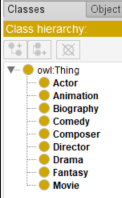


Αυτό μπορούμε να το φτιάξουμε κάνοντας απλά drag-and-drop τις αντίστοιχες κλάσεις

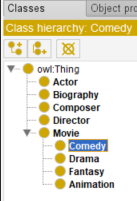

Αν επιλέξετε μια κλάση δεξιά εμφανίζεται η περιγραφή της

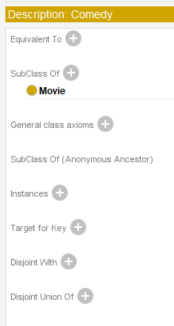

Μπορούμε να ορίσουμε ισοδυναμίες, υπερέννοιες, αξιώματα, άτομα και ξένες έννοιες πατώντας το αντίστοιχο σύμβολο protege-plus.PNG 

##3ο Μέρος: Εμπλουτισμένη Οντολογία και Δεδομένα
Στο τρίτο (3ο) μέρος της άσκησης καλείστε να χρησιμοποιήσετε κάποιο triplestore (προτείνεται το [GraphDB](https://graphdb.ontotext.com/)) στο οποίο θα "φορτώσετε" την εμπλουτισμένη οντολογία που δημιουργήσατε μέσω του Protégé στο δεύτερο (2ο) μέρος καθώς και τα δεδομένα που κρατήσαμε από το πρώτο (1ο) μέρος, να "τρέξετε" το reasoner ο οποίος θα εφαρμόσει στα δεδομένα σας όλους τους κανόνες που έχετε ορίσει μέσω της οντολογίας σας, εμπλουτίζοντας τα δεδομένα με τύπους και ρόλους (θα δείτε αναλύτικά πως λειτουργεί ένας reasoner στο μάθημα, και θα χρησιμοποιήσουμε εκτενέστερα reasoning στο επόμενο (3ο) θέμα), και στη συνέχεια να εκτελέσετε ορισμένα SPARQL ερωτήματα στην ολοκληρωμένη οντολογία σας ώστε να δείξετε τα αποτελέσματα της ορθότητας αλλά και του εμπλουτισμού της οντολογίας σας.
Για παράδειγμα εάν έχετε δημιουργήσει έννοιες Director και Actor οι οποίες είναι υποέννοιες του Artist, μερικά SPARQL ερωτήματα που θα μπορούσατε να κάνετε είναι να δείξετε πως μπορούμε πλέον να φέρουμε όλους τους ηθοποιούς απλώς ζητώντας όλους τους individuals που έχουν type Actor, αντίστοιχα με τους σκηνοθέτες και την έννοια Director, και τέλος να δείξετε πως εάν φέρετε όλους τους καλλτέχνες (Artist) τότε έχουμε σαν απάντηση την ένωση των δύο συνόλων. Καλείστε με αυτό τον τρόπο να παρουσιάσετε τουλάχιστον 4 αντίστοιχα παραδείγματα κατά προτίμηση να μην είναι ίδιου "είδους", δηλαδή να μην είναι όλα απλώς ιεραρχίες. Παρουσιάστε και σχολιάστε στο ακόλουθο markdown τα SPARQL ερωτήματα καθώς και τα αποτελέσματά τους / τι θέλουν να δείξουν.  
<!--Στο τέλος αυτού του μέρους να αποθηκεύσετε την οντολογία από το graphDB σε ένα αρχείο KR-Ex2_3.owl το οποίο θα παραδώσετε στο τέλος.--> 

### Απάντηση 3

**Παράδειγμα 1**

Στη γνώση μας έχουμε ορίσει το είδος ActionComedyMovie ως τις ταινίες που ανήκουν στα δύο genres ActionMovie και ComedyMovie. Για να ελέγξουμε την ορθότητα της γνώσης μας θα πραγματοποιήσουμε έλεγχο ισότητας των δύο εννοιών με τα παρακάτω 2 queries:

```sparql
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ns: <http://example.org/ns/>
PREFIX props: <http://example.org/props/>

SELECT * WHERE { 
	?a rdf:type ns:ActionComedyMovie.
}
```
δίνει τις ταινίες:
```
http://example.org/ns/tt0101020
http://example.org/ns/tt0172156
http://example.org/ns/tt0141369
http://example.org/ns/tt0425112
http://example.org/ns/tt0281364
http://example.org/ns/tt0416496
http://example.org/ns/tt0295178
http://example.org/ns/tt0059170
http://example.org/ns/tt0356910
http://example.org/ns/tt0119639
http://example.org/ns/tt0119472
http://example.org/ns/tt0031891
http://example.org/ns/tt0120912
http://example.org/ns/tt0486640
http://example.org/ns/tt0159603
http://example.org/ns/tt0106761
http://example.org/ns/tt0064160
http://example.org/ns/tt0811080
http://example.org/ns/tt0160127
http://example.org/ns/tt1268809
http://example.org/ns/tt0177882
```

```sparql
SELECT * WHERE { 
	?a rdf:type ns:ActionMovie,
    			ns:ComedyMovie.
}
```

δίνει
```
http://example.org/ns/tt0101020
http://example.org/ns/tt0172156
http://example.org/ns/tt0141369
http://example.org/ns/tt0425112
http://example.org/ns/tt0281364
http://example.org/ns/tt0416496
http://example.org/ns/tt0295178
http://example.org/ns/tt0059170
http://example.org/ns/tt0356910
http://example.org/ns/tt0119639
http://example.org/ns/tt0119472
http://example.org/ns/tt0031891
http://example.org/ns/tt0120912
http://example.org/ns/tt0486640
http://example.org/ns/tt0159603
http://example.org/ns/tt0106761
http://example.org/ns/tt0064160
http://example.org/ns/tt0811080
http://example.org/ns/tt0160127
http://example.org/ns/tt1268809
http://example.org/ns/tt0177882
```

άρα τα δύο queries είναι ισοδύναμα, όπως άλλωστε περιμένουμε.

**Παράδειγμα 2**

Έχουμε ορίσει την κλάση Person ως κλάση στην οποία ανήκουν όλοι οι άνθρωποι του κόσμου μας. Οι άνθρωποι του κόσμου ανήκουν αναγκαστικά σε μία τουλάχιστον εκ των κλάσεων Actor, Director, Writer και Composer. Για να ελέγξουμε την ορθότητα της οντολογίας μας θα βρούμε πρώτα το πλήθος όλων των Actor, ύστερα το πλήθος όλων των Director εξαιρουμένων όσων individuals εμφανίστηκαν στο query των Actor, το πλήθος όλων των Composer εξαιρώντας τους Actor και Director και όμοια το πλήθος των Writer. Τέλος, θα τα αθροίσουμε και θα τα συγκρίνουμε με το πλήθος όλων των Person.

```sparql
SELECT (COUNT(DISTINCT ?a) AS ?count) WHERE { 
	?a rdf:type ns:Actor.
}
```
με αποτέλεσμα 6636,
```sparql
SELECT (COUNT(DISTINCT ?a) AS ?count) WHERE { 
    ?a rdf:type ns:Director.
    MINUS {
    ?a rdf:type ns:Actor.
    }
}
```
με αποτέλεσμα 445,
```sparql 
SELECT (COUNT(DISTINCT ?a) AS ?count) WHERE { 
    ?a rdf:type ns:Writer.
    MINUS {
    	?a rdf:type ns:Actor.
    }
    MINUS {
        ?a rdf:type ns:Director.
    }
}
```
με αποτέλεσμα 488 και
```sparql
SELECT (COUNT(DISTINCT ?a) AS ?count) WHERE { 
    ?a rdf:type ns:Composer.
    MINUS {
    	?a rdf:type ns:Actor.
    }
    MINUS {
        ?a rdf:type ns:Director.
    }
    MINUS {
        
    ?a rdf:type ns:Writer.
    }
}
```
με αποτέλεσμα 295, ενώ το query
```sparql
SELECT (COUNT(DISTINCT ?a) AS ?count) WHERE { 
    ?a rdf:type ns:Person.
}
```
έχει αποτέλεσμα 7864 = 6636+445+488+295, το οποίο και περιμέναμε αφού ορίσαμε το Person ως υπερέννοια των Actor, Director, Writer και Composer.

**Παράδειγμα 3**

Το Place είναι η έννοια που περιλαμβάνει όλα τα individuals των Country και Narrative_Location. Θα ελέγξουμε αν είναι ορθή η γνώση μας ως εξής:

```sparql
SELECT (COUNT(DISTINCT ?country) AS ?count) WHERE { 
    ?country rdf:type ns:Country.
}
```
δίνει το πλήθος των χωρών που περιλαμβάνονται στη γνώση μας ίσο με 65, το 
```sparql 
SELECT (COUNT(DISTINCT ?nar_loc) AS ?count) WHERE { 
    ?nar_loc rdf:type ns:Narrative_Location.
    MINUS {
        ?nar_loc rdf:type ns:Country.
    }
}
```
δίνει το πλήθος των Narrative_Location αφαιρώντας όσα individuals περιέχονταν στο παραπάνω query ως 185, και το 
```sparql
SELECT (COUNT(DISTINCT ?place) AS ?count) WHERE { 
    ?place rdf:type ns:Place.
}
```
δίνει το πλήθος των Place στη γνώση ως 250=185+65 το οποίο και αναμέναμε.

**Παράδειγμα 4**

Βλέπουμε πως στο query 
```sparql
SELECT (COUNT(DISTINCT ?award) AS ?count) WHERE { 
    ?award rdf:type ns:Award.
}
```
έχουμε αποτέλεσμα 28, ενώ στο
```sparql 
SELECT (COUNT(DISTINCT ?nomination) AS ?count) WHERE { 
    ?nomination rdf:type ns:AwardNomination.
}
```
έχουμε επίσης 28, το οποίο περιμέναμε αφού το Award είναι η μοναδική υποκλάση του Award_Nomination καθώς για κάθε κερδισμένο βραβείο είναι απαραίτητο να έχει προταθεί η ταινία για αυτό αλλά όχι το αντίθετο.

**Παράδειγμα 5**

Θα ελέγξουμε τώρα πως όλα τα individuals τύπου Person ικανοποιούν το ρόλο has_contributor.
Το query
```sparql
SELECT (COUNT(DISTINCT ?person) AS ?count) WHERE { 
    ?movie props:has_contributor ?person.
}
```
δίνει αποτέλεσμα 7864, όπως δηλαδή και το query που επέστρεφε όλα τα individuals τύπου Person στο παράδειγμα 2.

**Παράδειγμα 6**

Θα δοκιμάσουμε τώρα αν ο ρόλος director είναι αντίστροφος του ρόλου is_director, όπως το έχουμε ορίσει. Το query
```sparql
SELECT (COUNT(DISTINCT ?director) AS ?count) WHERE { 
    ?movie props:director ?director.
}
```
δίνει αποτέλεσμα 482, 
ενώ το 
```sparql 
SELECT (COUNT(DISTINCT ?director) AS ?count) WHERE { 
    ?director props:is_director ?movie.
}
```
δίνει επίσης αποτέλεσμα 482, άρα ικανοποιείται.
Ομοίως συμβαίνει και για τα άλλα ζευγάρια αντίστροφων ρόλων (has_contributor-is_contributor, writer-is_writer, actor-is_actor, composer-is_composer, language-is_spoken).

### Μικρό tutorial GraphDB

Αφού εγκατασταθεί και τρέξει η free έκδοση του GraphDB, θα ανοίξει ένα παράθυρο στο browser, στη διεύθυνση http://localhost:7200/ . Φτιάχνετε ένα repository, στο ruleset επιλέγετε OWL 2 RL. Πάνω αριστερά πατάτε Import->RDF upload RDF files και ανεβάζετε δύο αρχεία:
- Το ```myonto-graphDB.owl``` που είναι η οντολογία που φτιάξατε στο protegé  
- Το ```KR-Ex2_1.owl``` που είναι ο γράφος γνώσης με διορθώσεις όπως παράχθηκε στο ερώτημα 1.2.3

Στη συνέχεια μπορείτε να πατήσετε αριστερά Explore->Class Hierarchy για να επιβεβαιώσετε πως η οντολογία φορτώθηκε σωστά, και στη συνέχεια με την επιλογή SPARQL αριστερά θα τρέξετε τα ερωτήματα για την επίλυση της άσκησης.  

##After exercise suggestions:

###Actor of the exercise: **Mads Mikkelsen**

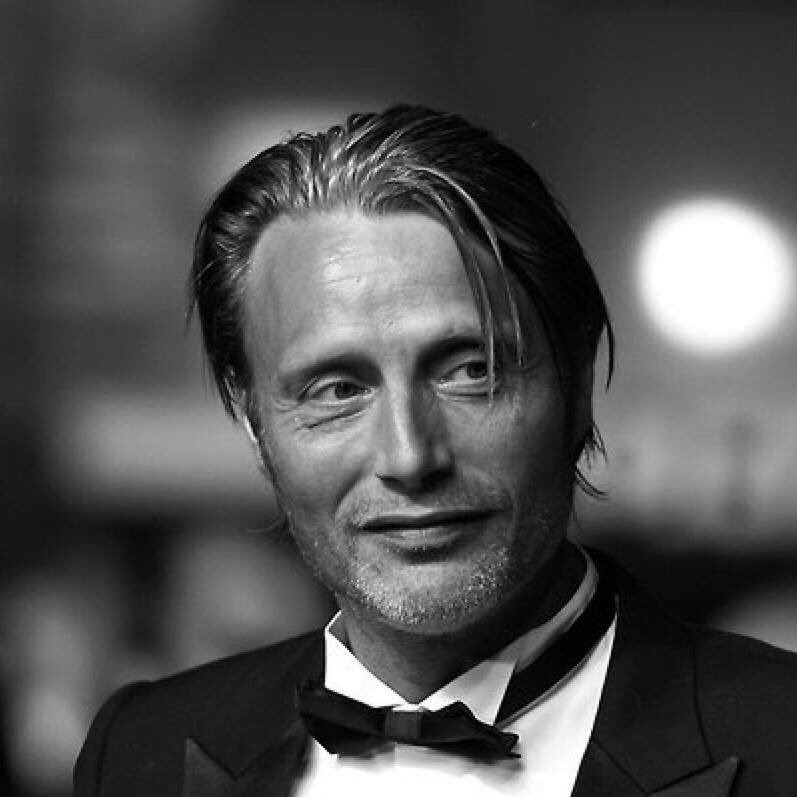

###Director of the exercise: **Gaspar Noé**


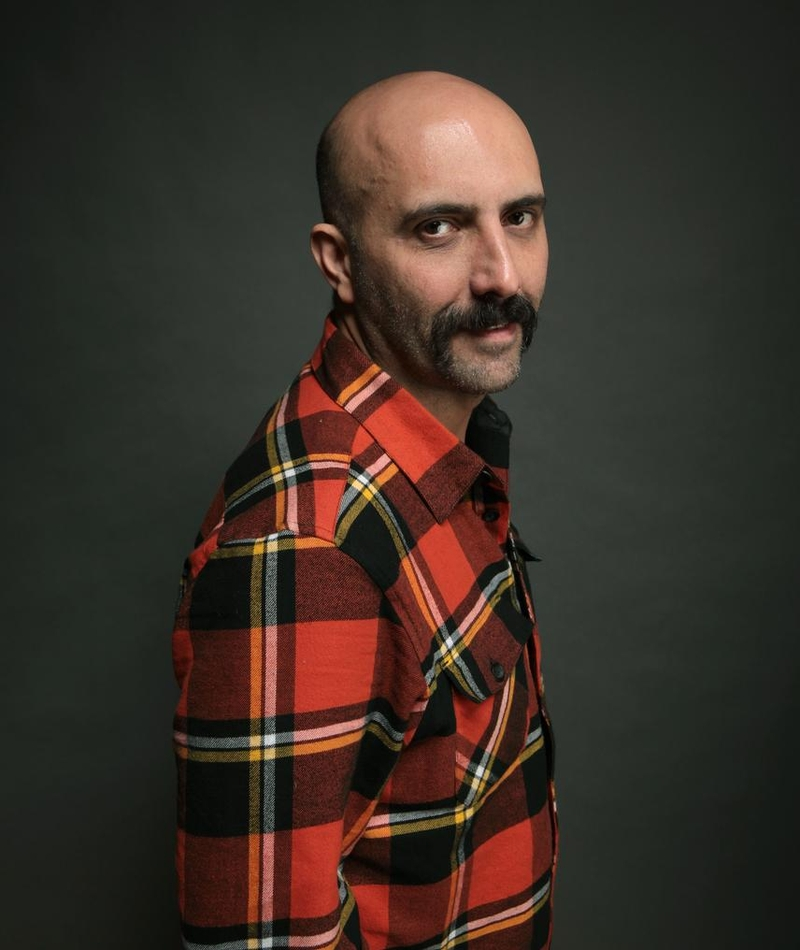

###Movie of the exercise: **The Seventh Seal**

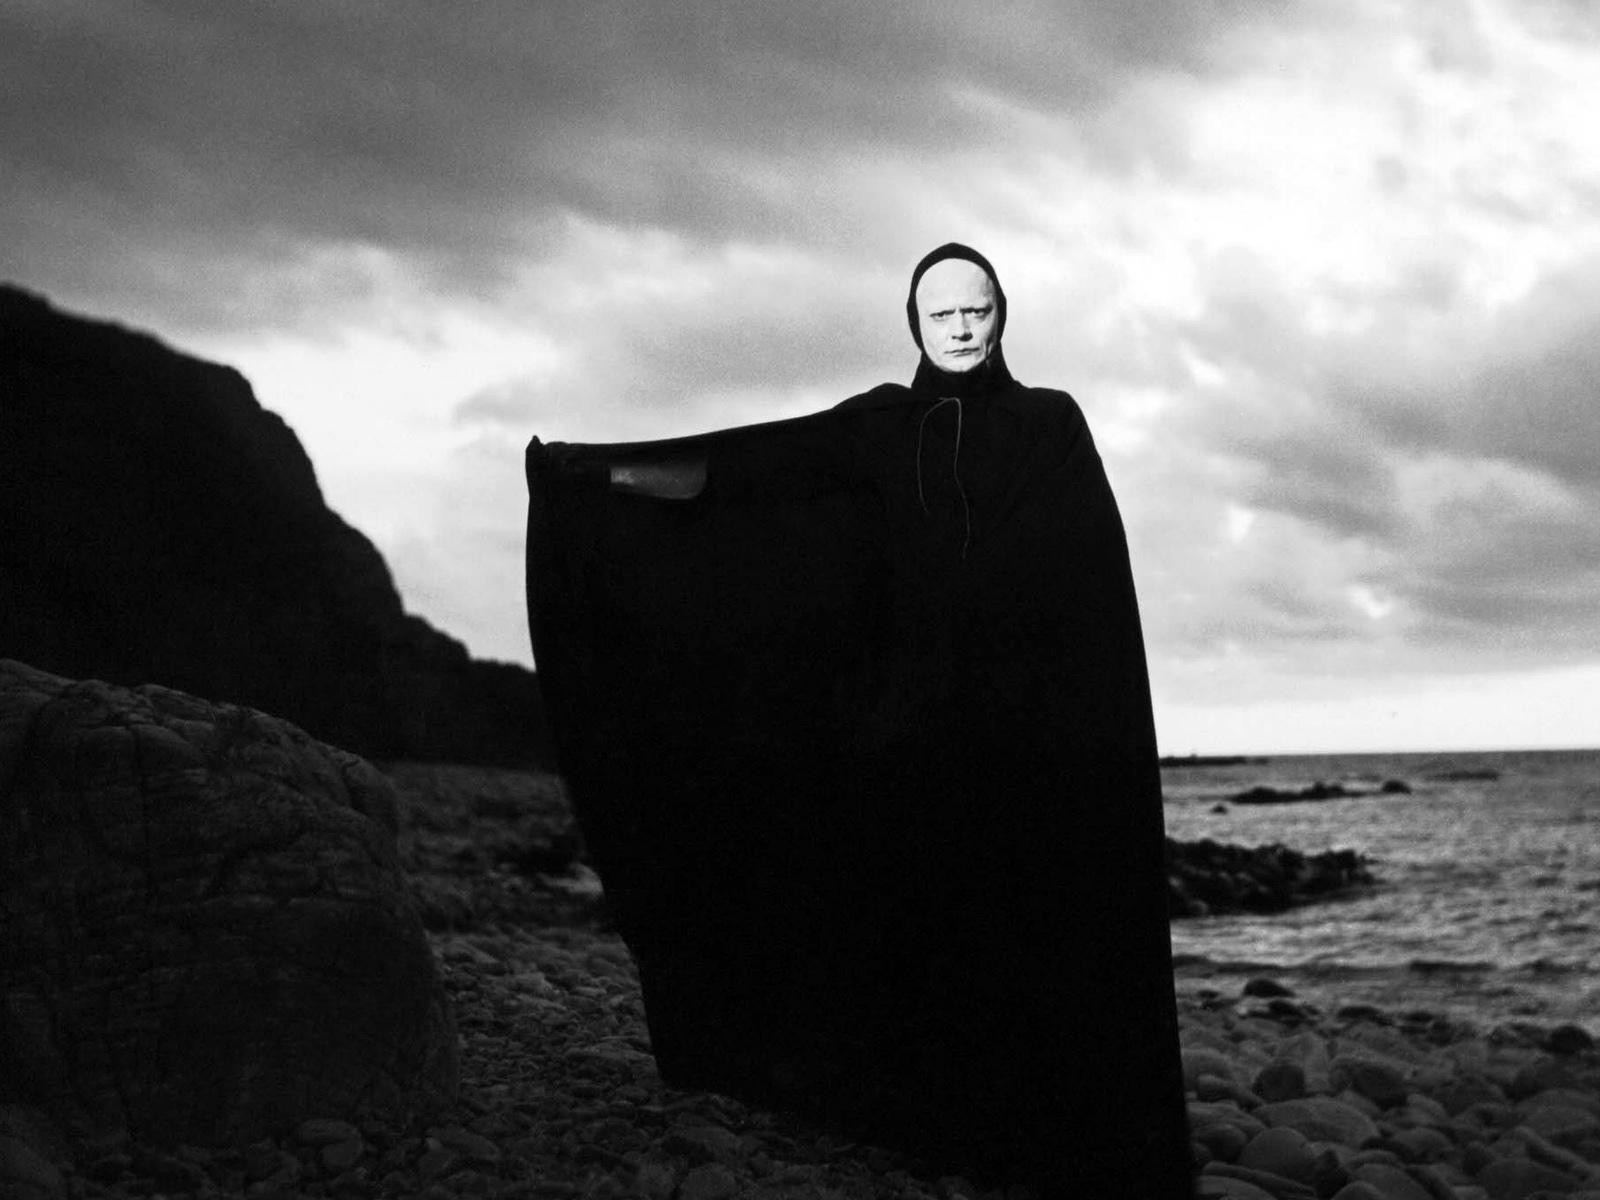

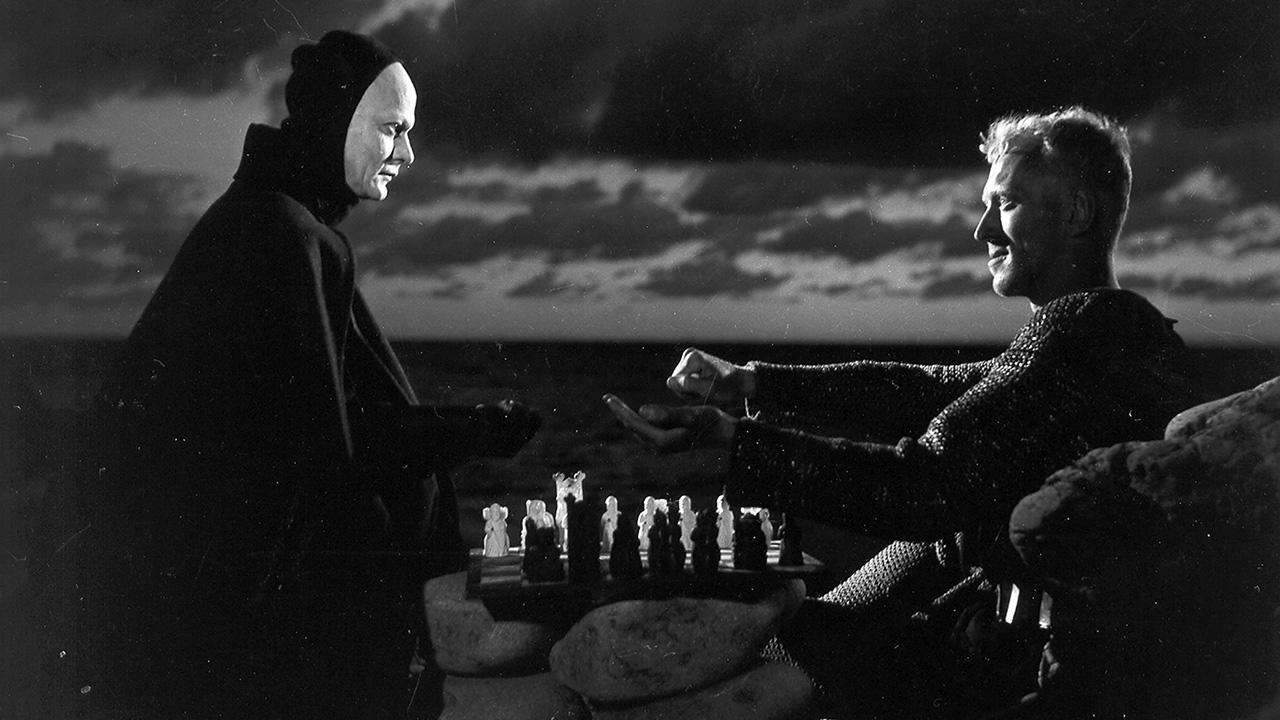

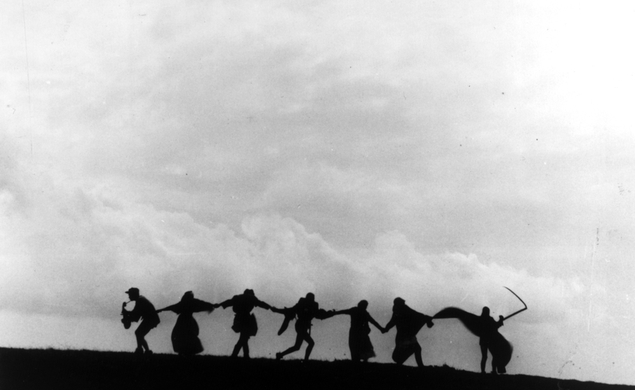

###Any suggestions by you?